## Import the libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

### Import the data we need

In [4]:
Fradulent_emails = pd.read_csv('fraudulent_emails.csv')

In [5]:
Fradulent_emails.head()

,sender_email,sender_name,recipient_name,date_sent,subject,email_body,recipient_email
0,james_ngola2002@maktoob.com,"""MR. JAMES NGOLA.""",NaN,31 Oct 2002,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,NaN
1,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",NaN,31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",NaN
2,obong_715@epatra.com,"""PRINCE OBONG ELEME""",NaN,31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,NaN
3,obong_715@epatra.com,"""PRINCE OBONG ELEME""",NaN,31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,NaN
4,m_abacha03@www.com,"""Maryam Abacha""",NaN,1 Nov 2002,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",NaN


## Let's see the shape of the data (Columns, and rows)

In [8]:
print('The data shape =>', Fradulent_emails.shape)

The data shape => (3977, 7)


#### Columns

In [9]:
Fradulent_emails.columns

Index(['sender_email', 'sender_name', 'recipient_name', 'date_sent', 'subject',
       'email_body', 'recipient_email'],
      dtype='object')

### Important columns in our data
+ email_body
+ sender_email
+ subject

### Using only the important columns

In [11]:
Fradulent_emails = Fradulent_emails[['sender_email','subject','email_body']]

In [12]:
print('Shape of data ==>', Fradulent_emails.shape)

Shape of data ==> (3977, 3)


In [13]:
Fradulent_emails.head()

,sender_email,subject,email_body
0,james_ngola2002@maktoob.com,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...
1,bensul2004nng@spinfinder.com,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ..."
2,obong_715@epatra.com,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
3,obong_715@epatra.com,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
4,m_abacha03@www.com,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope..."


# Preprocessing of Data

In [14]:
Fradulent_emails.isnull().sum()

sender_email    473
subject          27
email_body        1
dtype: int64

In [15]:
Fradulent_emails.dropna(inplace=True)

In [16]:
Fradulent_emails.isnull().sum()

sender_email    0
subject         0
email_body      0
dtype: int64

In [17]:
Fradulent_emails.head()

,sender_email,subject,email_body
0,james_ngola2002@maktoob.com,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...
1,bensul2004nng@spinfinder.com,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ..."
2,obong_715@epatra.com,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
3,obong_715@epatra.com,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
4,m_abacha03@www.com,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope..."


In [18]:
Fradulent_emails.groupby('sender_email').sum()

,subject,email_body
sender_email,,
03mariam@tiscali.co.uk,Hi,"FROM:MRS. M SESE-SEKO.\n\nDEAR FRIEND,\n\n I A..."
1sssss@myway.com,GOOD DAY,"\n>From Mrs.Nazek Hariri\n\nPresident,Hariri O..."
2003vincent@freesurf.fr,!!!ASSISTANCE NEEDED!!!,"Attention: Friend,\n\nI am Barrister Vincent U..."
2katherine@terra.com.mx,GET BACK TO ME,[<email.message.Message object at 0x7fe273b260...
78jk22hg5jk7@fszz.com.cn,letter for business,<html>\n<head>\n<title>ޱĵ</title>\n<meta http-...
...,...,...
zulumakaleni1@netscape.net,PARTNERSHIP SOLICITED,CONFIDENTIAL BUSINESS PARTNERSHIP SOLICITED...
zuma_bullians333@atlas.sk,ANSWER OUR CRY,[<email.message.Message object at 0x7fe27427d2...
zumaseko@handbag.com,HELLO,\nDear Friend!\n \n \n It is with heart of hop...


In [19]:
Fradulent_emails.head()

,sender_email,subject,email_body
0,james_ngola2002@maktoob.com,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...
1,bensul2004nng@spinfinder.com,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ..."
2,obong_715@epatra.com,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
3,obong_715@epatra.com,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
4,m_abacha03@www.com,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope..."


In [20]:
Fradulent_emails = Fradulent_emails.groupby('sender_email').filter(lambda x: len(x)>5)

In [21]:
Fradulent_emails.head()

,sender_email,subject,email_body
745,semassaq@o2.pl,HELP ME PLEASE,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
894,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
895,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
896,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
908,semassaq@o2.pl,I NEED YOUR HELP PLEASE,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."


## Unique products

In [22]:
Fradulent_emails['sender_email'].unique()

array(['semassaq@o2.pl', 'dradophilusjaja@tiscali.co.uk',
       'davidch@yahoo.com', 'researchers-owner@krusty.si.UM',
       'ibrahimbaajisan@indiatimes.com', 'joe_kekabu4@latinmail.com',
       'mrsfarah_al@she.com', 'Nkanga.e@katamail.com',
       'project2thh@yahoo.com.hk'], dtype=object)

In [23]:
len(Fradulent_emails['sender_email'].unique())

9

In [24]:
Fradulent_emails.head()

,sender_email,subject,email_body
745,semassaq@o2.pl,HELP ME PLEASE,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
894,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
895,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
896,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
908,semassaq@o2.pl,I NEED YOUR HELP PLEASE,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."


## Data Cleaning

In [25]:
Fradulent_emails['sender_email'].unique()

array(['semassaq@o2.pl', 'dradophilusjaja@tiscali.co.uk',
       'davidch@yahoo.com', 'researchers-owner@krusty.si.UM',
       'ibrahimbaajisan@indiatimes.com', 'joe_kekabu4@latinmail.com',
       'mrsfarah_al@she.com', 'Nkanga.e@katamail.com',
       'project2thh@yahoo.com.hk'], dtype=object)

In [26]:
Fradulent_emails['email_body']

745     DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE...
894     DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE...
895     DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE...
896     DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE...
908     DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE...
                              ...                        
3615    \n\n\nDear Friend,\n\nHow are you doing? I wou...
3616    \n\n\nDear Friend,\n\nHow are you doing? I wou...
3617    \n\n\nDear Friend,\n\nHow are you doing? I wou...
3618    \n\n\nDear Friend,\n\nHow are you doing? I wou...
3619    \n\n\nDear Friend,\n\nHow are you doing? I wou...
Name: email_body, Length: 68, dtype: object

### Cleaning the email_body

In [27]:
for index, text in enumerate(Fradulent_emails['email_body'][0:4]):
    print('Fraduelent Email {}\n {}'.format(index+1, text))

Fraduelent Email 1
 DEAR FRIEND,

THROUGH THE COURTESY OF BUSINESS OPPORTUNITY, I TAKE LIBERTY ANCHORED ON A STRONG DESIRE TO SOLICIT YOUR ASSISTANCE ON THIS MUTUALLY BENEFICIAL AND RISKFREE TRANSACTION WHICH I HOPE YOU WILL GIVE YOUR URGENT ATTENTION.

I AM MR.SESAY MASSAQUOE I AM MOVED TO WRITE YOU THIS LETTER ,THIS WAS IN CONFIDENCE CONSIDERING OUR PRESENT CIRCUMSTANCE AND SITUATION.

I ESCAPED WITH MY WIFE AND CHILDREN OUT OF SIERRA- LEONE TO GROU-JIRNSSUM,A VILLAGE IN THE NETHERLANDS THROUGH THE AID OF THE UNITED NATIONS EVACUATION TEAM WHERE WE ARE NOW PRESENTLY RESIDING ON TEMPORARY POLITICAL ASYLUM.

HOWEVER DUE TO THIS SITUATION I DECIDED TO CHANGE MOST OF MY BILLIONS OF DOLLARS DEPOSITED IN SWISS BANK AND OTHER COUNTRIES INTO OTHER FORMS OF MONEY CODED FOR SAFE PURPOSE BECAUSE THE NEW HEAD OF STATES AHMED TEJAN KABBA MADE ARRANGEMENTS WITH THE SWISS GOVERNMENT AND OTHER EUROPEAN COUNTRIES TO FREEZE ALL MY TREASURES DEPOSITED IN SOME EUROPEAN COUNTRIES,HENCE I AND MY WIFE ALON

### Here, We have some contractions, for example: “Aren't”, numbers, for example “5” and punctuations, for example “.”, “/” and “?” present in the email_body data.

In [28]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

### Next is to compile the contactions with re.compile

In [29]:
contractions_re = re.compile('({})'.format('|'.join(contractions_dict.keys())))
contractions_re


re.compile(r"(ain't|'s|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|how'd|how'd'y|how'll|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|should've|shouldn't|shouldn't've|so've|that'd|that'd've|there'd|there'd've|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what've|when've|where'd|where've|who'll|who'll've|who've|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

## contractions_re, then becomes a search pattern

## Next, we expand contractions

In [30]:

def expand_contractions(text, contractions_dict = contractions_dict):
    
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [31]:
Fradulent_emails['email_body']= Fradulent_emails['email_body'].apply(lambda x: expand_contractions(x))

In [32]:
Fradulent_emails.head()

,sender_email,subject,email_body
745,semassaq@o2.pl,HELP ME PLEASE,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
894,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
895,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
896,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."
908,semassaq@o2.pl,I NEED YOUR HELP PLEASE,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE..."


## Converting the body to lowercase

In [33]:
Fradulent_emails['cleaned'] = Fradulent_emails['email_body'].apply(lambda x: x.lower())

In [34]:
Fradulent_emails.head()

,sender_email,subject,email_body,cleaned
745,semassaq@o2.pl,HELP ME PLEASE,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE...","dear friend,\n\nthrough the courtesy of busine..."
894,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE...","dear friend,\n\nthrough the courtesy of busine..."
895,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE...","dear friend,\n\nthrough the courtesy of busine..."
896,semassaq@o2.pl,HELP ME AND MY FAMILY PLEASE.,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE...","dear friend,\n\nthrough the courtesy of busine..."
908,semassaq@o2.pl,I NEED YOUR HELP PLEASE,"DEAR FRIEND,\n\nTHROUGH THE COURTESY OF BUSINE...","dear friend,\n\nthrough the courtesy of busine..."


#### Next we extract email messages

In [35]:
Fradulent_emails['cleaned'] = Fradulent_emails['cleaned'].apply(lambda x: re.sub('\n','',x))
Fradulent_emails['cleaned']

745     dear friend,through the courtesy of business o...
894     dear friend,through the courtesy of business o...
895     dear friend,through the courtesy of business o...
896     dear friend,through the courtesy of business o...
908     dear friend,through the courtesy of business o...
                              ...                        
3615    dear friend,how are you doing? i would be very...
3616    dear friend,how are you doing? i would be very...
3617    dear friend,how are you doing? i would be very...
3618    dear friend,how are you doing? i would be very...
3619    dear friend,how are you doing? i would be very...
Name: cleaned, Length: 68, dtype: object

#### Removing the punctuations from the body

In [36]:
Fradulent_emails['cleaned'] = Fradulent_emails['cleaned'].apply(lambda x: re.sub('[{}]'.format(re.escape(string.punctuation)), ' ',x))
Fradulent_emails['cleaned']

745     dear friend through the courtesy of business o...
894     dear friend through the courtesy of business o...
895     dear friend through the courtesy of business o...
896     dear friend through the courtesy of business o...
908     dear friend through the courtesy of business o...
                              ...                        
3615    dear friend how are you doing  i would be very...
3616    dear friend how are you doing  i would be very...
3617    dear friend how are you doing  i would be very...
3618    dear friend how are you doing  i would be very...
3619    dear friend how are you doing  i would be very...
Name: cleaned, Length: 68, dtype: object

In [37]:
for index, text in enumerate(Fradulent_emails['cleaned'][0:3]):
    print('Fraudulent Email {}\n {}'.format(index+1, text))

Fraudulent Email 1
 dear friend through the courtesy of business opportunity  i take liberty anchored on a strong desire to solicit your assistance on this mutually beneficial and riskfree transaction which i hope you will give your urgent attention i am mr sesay massaquoe i am moved to write you this letter  this was in confidence considering our present circumstance and situation i escaped with my wife and children out of sierra  leone to grou jirnssum a village in the netherlands through the aid of the united nations evacuation team where we are now presently residing on temporary political asylum however due to this situation i decided to change most of my billions of dollars deposited in swiss bank and other countries into other forms of money coded for safe purpose because the new head of states ahmed tejan kabba made arrangements with the swiss government and other european countries to freeze all my treasures deposited in some european countries hence i and my wife along with m

# Next step is Document Term Matrix

- Stopwords Removal
- Lemmatization
- Create Document Term Matrix

In [38]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [39]:
Fradulent_emails['cleaned'] = Fradulent_emails['cleaned'].apply(lambda x: " ".join(token.lemma_ for token in nlp(x) if not token.is_stop))

In [41]:
Fradulent_emails_group = Fradulent_emails[['sender_email','cleaned']].groupby('sender_email').sum()

In [42]:
Fradulent_emails_group

,cleaned
sender_email,
Nkanga.e@katamail.com,complimentsbefore introduce 2c wish inform let...
davidch@yahoo.com,dr 2edavid clovi 28esq 2e 29rue portin x bla...
dradophilusjaja@tiscali.co.uk,dr adophilusjaja accountant general united b...
ibrahimbaajisan@indiatimes.com,email message message object 0x7fe273c178b0...
joe_kekabu4@latinmail.com,email message message object 0x7fe273ad26a0...
mrsfarah_al@she.com,3a mrs farah al hashemiaddress 3a chiang rai h...
project2thh@yahoo.com.hk,dear friend interested offeringyou time pay ...
researchers-owner@krusty.si.UM,email message message object 0x7fe273c71c10...
semassaq@o2.pl,dear friend courtesy business opportunity li...


## Creating the document term matrix

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(Fradulent_emails_group['cleaned'])
df = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df.index = Fradulent_emails_group.index

In [45]:
df.head(6)

,000,0x7fe273ad21c0,0x7fe273ad21f0,0x7fe273ad2610,0x7fe273ad26a0,0x7fe273ad26d0,0x7fe273ad2790,0x7fe273ad27c0,0x7fe273ad2850,0x7fe273c170d0,...,work,workinga,world,write,www,yahoo,year,yourpersonal,yourpositive,yousu
sender_email,,,,,,,,,,,,,,,,,,,,,
Nkanga.e@katamail.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
davidch@yahoo.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0
dradophilusjaja@tiscali.co.uk,0,0,0,0,0,0,0,0,0,0,...,7,0,0,7,7,7,0,0,0,7
ibrahimbaajisan@indiatimes.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe_kekabu4@latinmail.com,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
mrsfarah_al@she.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0


## Wordcloud

In [46]:
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
    wc = WordCloud(width = 400, height = 330, max_words = 150, colormap='Dark2').generate_from_frequencies(data)
    plt.figure(figsize = (10,8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title, 60)), fontsize = 13)
    plt.show()


## Transpose the document term matrix

In [47]:
df_dtm = df.transpose()
df_dtm

sender_email,Nkanga.e@katamail.com,davidch@yahoo.com,dradophilusjaja@tiscali.co.uk,ibrahimbaajisan@indiatimes.com,joe_kekabu4@latinmail.com,mrsfarah_al@she.com,project2thh@yahoo.com.hk,researchers-owner@krusty.si.UM,semassaq@o2.pl
000,0,0,0,0,0,0,0,0,10
0x7fe273ad21c0,0,0,0,0,1,0,0,0,0
0x7fe273ad21f0,0,0,0,0,1,0,0,0,0
0x7fe273ad2610,0,0,0,0,1,0,0,0,0
0x7fe273ad26a0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
yahoo,0,0,7,0,0,0,9,0,0
year,0,8,0,0,0,6,9,0,0
yourpersonal,0,0,0,0,0,0,9,0,0
yourpositive,0,0,0,0,0,0,0,0,9


## Ploting wordcloud for each body

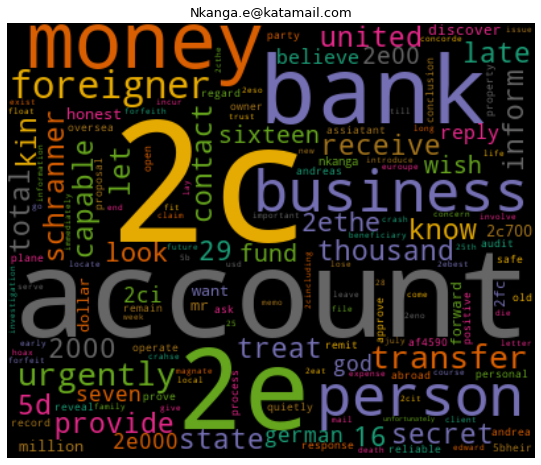

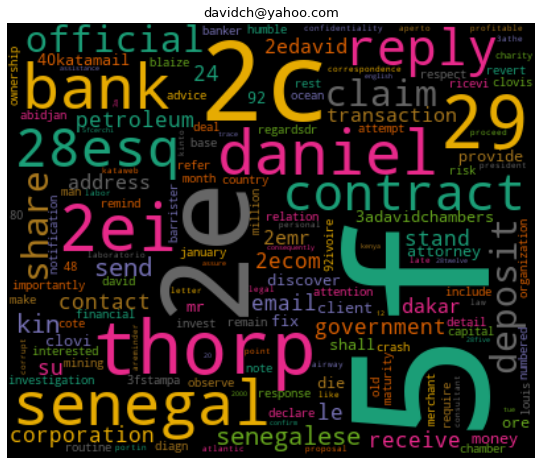

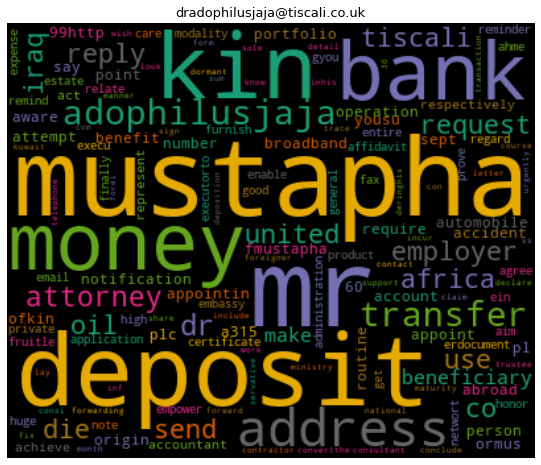

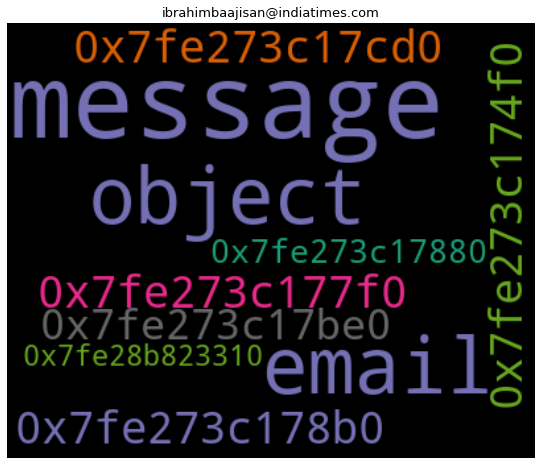

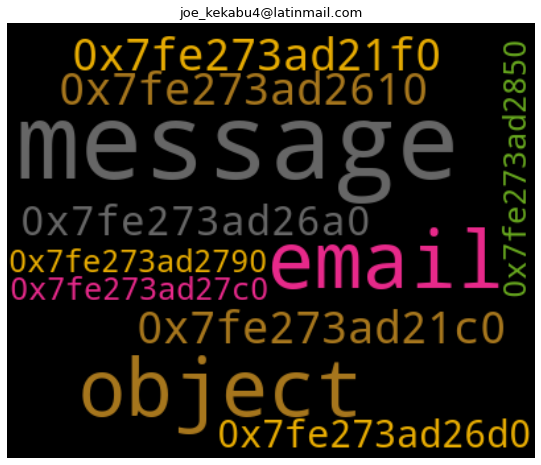

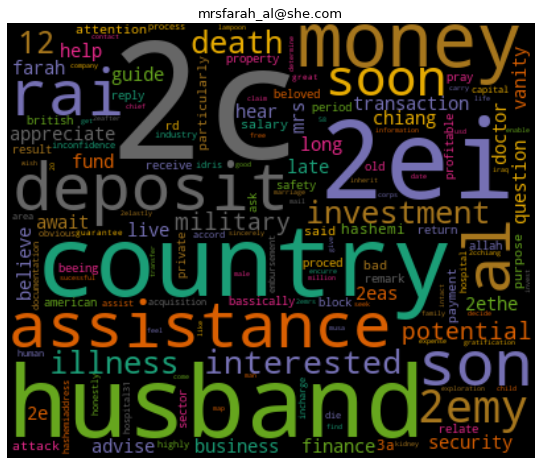

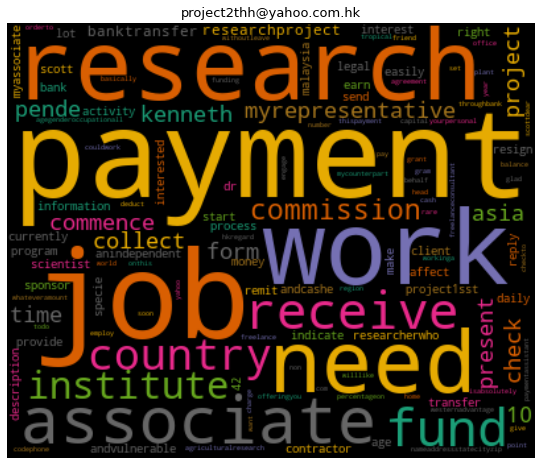

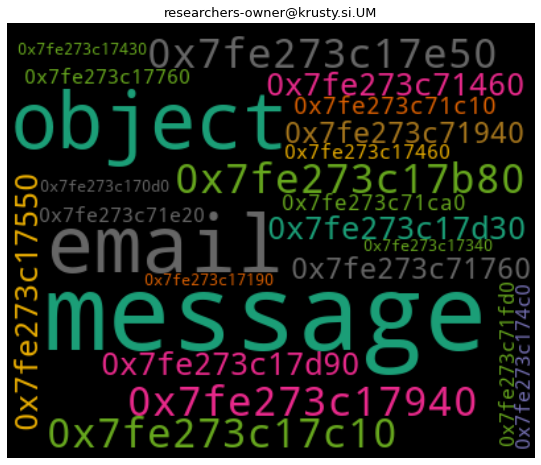

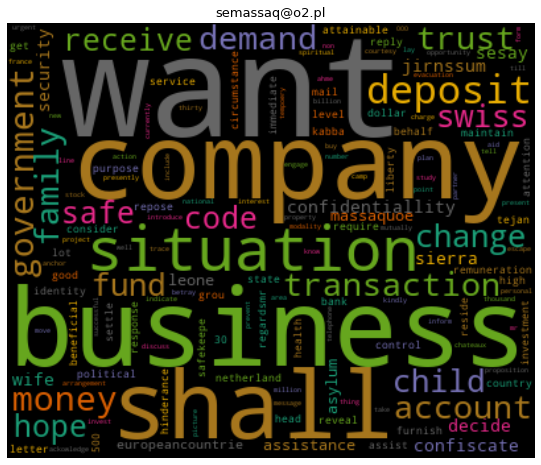

In [48]:
for index,email in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[email].sort_values(ascending=False), email) 